In [1]:
# workbook for hw1
# author: ruth wang
# date: May 10, 2015

# install and import packages
!pip install seaborn 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# enables inline plots
%matplotlib inline

In [23]:
# read csv
df = pd.read_csv('titanic.csv', header = 0)
df.info()
# How many passengers are in our passenger list? 
# 891 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [24]:
# What is the overall survival rate?
df.Survived.mean()

0.38383838383838381

In [49]:
# How many male passengers were onboard?
# How many female passengers were onboard?
df.groupby(['Sex']).PassengerId.count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [55]:
# What is the overall survival rate of male passengers?
# What is the overall survival rate of female passengers?
df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [54]:
# What is the average age of all passengers onboard?
df[df['Age'].isnull()]
# replace NaN with NA's 
df.Age.fillna('NA')
df.Age.mean()

29.69911764705882

In [56]:
# What is the average age of passengers who survived?
# What is the average age of passengers who did not survive?
df.groupby(['Survived']).Age.mean()

Survived
0           30.626179
1           28.343690
Name: Age, dtype: float64

In [43]:
# At this (early) point in our analysis, what might you infer about any patterns you are seeing
# It seems that women and children were more likely to survive from Titanic

29.69911764705882

In [57]:
# How many passengers are in each of the three classes of service (e.g. First, Second, Third?)
df.groupby('Pclass').PassengerId.count()

Pclass
1         216
2         184
3         491
Name: PassengerId, dtype: int64

In [58]:
# What is the survival rate for passengers in each of the three classes of service?
df.groupby('Pclass').Survived.mean()

Pclass
1         0.629630
2         0.472826
3         0.242363
Name: Survived, dtype: float64

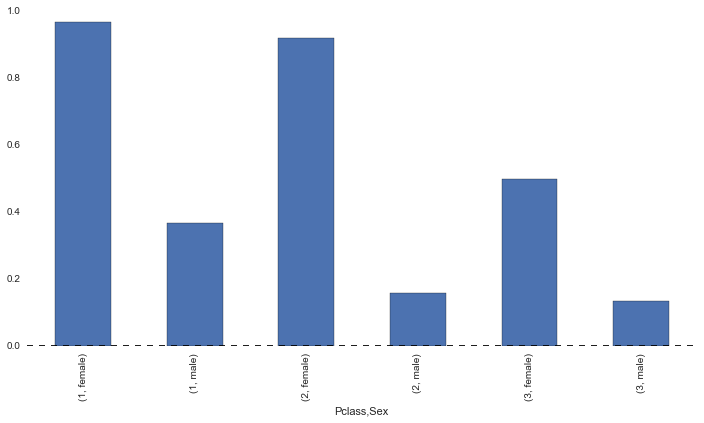

In [61]:
# What else might you conclude?
df.groupby(['Pclass','Sex']).Survived.mean().plot(kind ='bar',figsize = (12,6))
# Man in 1st class is less likely to survive compard to women in 3rd class. 

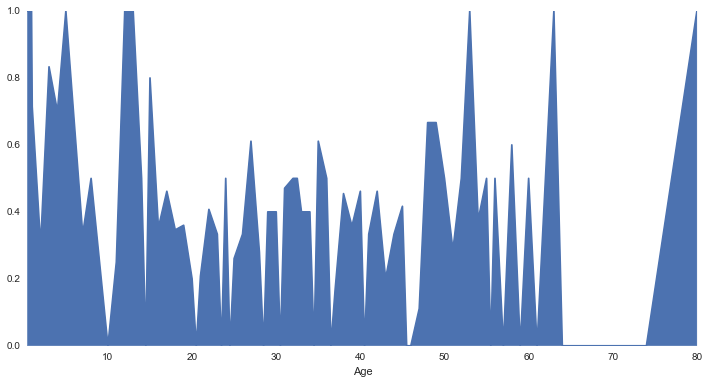

In [81]:
# How is age correlated with survival rate?
df.groupby(['Age']).Survived.mean().plot(kind = 'area', figsize = (12,6))
# children and older people are more likely to survive

In [82]:
df.groupby('Embarked').Survived.mean()

Embarked
C           0.553571
Q           0.389610
S           0.336957
Name: Survived, dtype: float64

In [ ]:
# Last, if we were to build a predictive model, we would use the following features:
# Age, Sex, Pclass, Embarked